In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats

In [20]:
# Read dataset CSV
df = pd.read_csv('Wholesale customers data.csv')

In [21]:
# Check for null values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [22]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [23]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [24]:
# Remove nominal columns
df = df.drop(columns=['Channel', 'Region'])

In [25]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


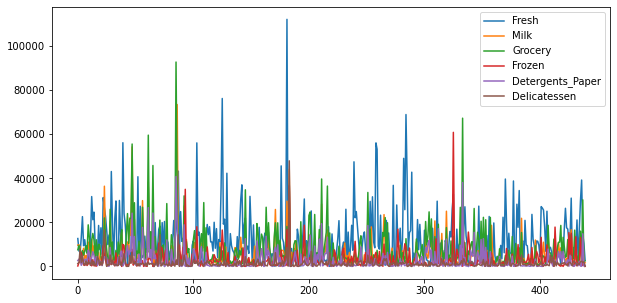

In [26]:
# Plot Dataset
df.plot(figsize=(10,5))

In [27]:
# Scale Data
sc = StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(df))
df_sc.columns = df.columns

In [28]:
df_sc.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [30]:
# Initialize PCA
pca = PCA()
pca.fit(df_sc)

PCA()

In [33]:
# Calculate explained variance ratio
percentage_var_explained = pca.explained_variance_ratio_
cum_var_explained = np.cumsum(percentage_var_explained)

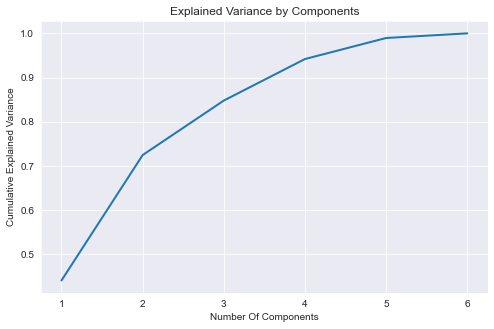

In [34]:
# Plot Cumulative Explained Variance
sns.set_style("dark")
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(1, 7), cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.title('Explained Variance by Components')
plt.xlabel('Number Of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [36]:
# Apply PCA with 4 Components
pca = PCA(n_components=4)
pca.fit(df_sc)
pca.transform(df_sc)
pca_vals=pca.transform(df_sc)

In [39]:
# Create a DataFrame with 
pca_df = pd.DataFrame(pca_vals)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4']

In [40]:
pca_df.head(5)

,PC1,PC2,PC3,PC4
0,0.193291,-0.305100,-0.140878,-0.486432
1,0.434420,-0.328413,0.319007,-0.178830
2,0.811143,0.815096,1.523416,-1.254082
3,-0.778648,0.652754,0.163012,0.380060
4,0.166287,1.271434,0.066279,-0.826227


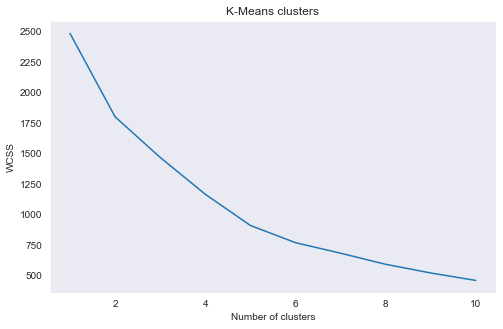

In [42]:
# The 'elbow rule'
# Plot the WCSS value to try to get the optimal number of clusters
# Run K-means several times for cluster numbers 1-10

wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(pca_vals)
    wcss.append(kmeans_pca.inertia_)

sns.set_style("dark")
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
# Run K-means for 2 clusters
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_pca.fit(pca_vals)

KMeans(n_clusters=2, random_state=42)

In [45]:
# Join the original values, the PCA values and the cluster label into one DataFrame
df_kmeans_pca=pd.concat([df.reset_index(drop=True),pd.DataFrame(pca_vals)],axis=1)
df_kmeans_pca.columns.values[-4:] = ["PC1",'PC2', 'PC3', 'PC4']
df_kmeans_pca['K-Means PCA'] = kmeans_pca.labels_
df_kmeans_pca['K-means Cluster'] = df_kmeans_pca['K-Means PCA'].map({0:'Cluster 1',1:'Cluster 2'})
df_kmeans_pca.drop(columns=['K-Means PCA'], inplace = True)

In [46]:
df_kmeans_pca

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,PC1,PC2,PC3,PC4,K-means Cluster
0,12669,9656,7561,214,2674,1338,0.193291,-0.305100,-0.140878,-0.486432,Cluster 1
1,7057,9810,9568,1762,3293,1776,0.434420,-0.328413,0.319007,-0.178830,Cluster 1
2,6353,8808,7684,2405,3516,7844,0.811143,0.815096,1.523416,-1.254082,Cluster 1
3,13265,1196,4221,6404,507,1788,-0.778648,0.652754,0.163012,0.380060,Cluster 1
4,22615,5410,7198,3915,1777,5185,0.166287,1.271434,0.066279,-0.826227,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0.870602,2.220845,-0.605500,1.049263,Cluster 1
436,39228,1431,764,4510,93,2346,-0.902520,1.676916,-1.418980,-0.572274,Cluster 1
437,14531,15488,30243,437,14841,1867,3.465704,-1.039838,-0.713161,0.033408,Cluster 2
438,10290,1981,2232,1038,168,2125,-0.918023,-0.030047,0.258408,-0.524578,Cluster 1


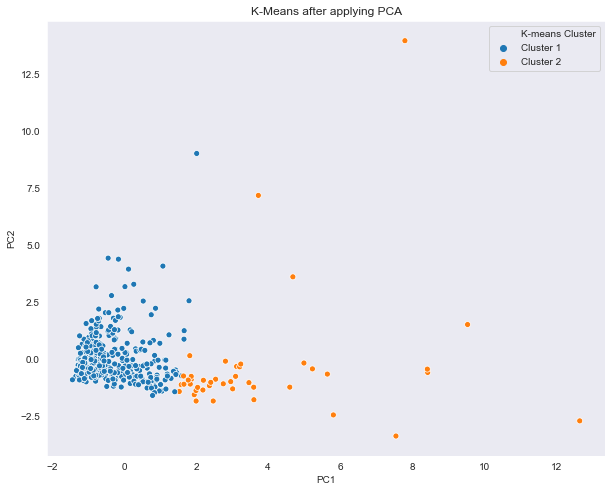

In [49]:
# Plot the two clusters on the first two Principal Components
x_axis=df_kmeans_pca['PC1']
y_axis=df_kmeans_pca['PC2']
plt.figure(figsize=(10,8))
plt.title('K-Means after applying PCA')
sns.scatterplot(x_axis,y_axis, hue = df_kmeans_pca['K-means Cluster'] )
plt.show()